# Lab Activity 4 

Today we are going to learn about confidence intervals of the mean. 

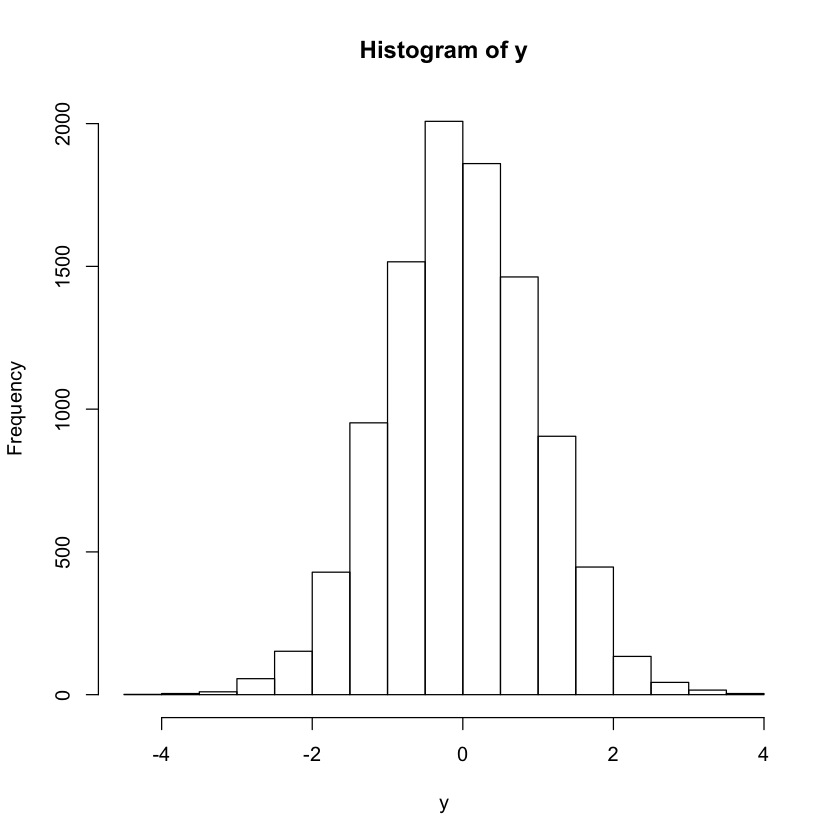

In [3]:
y <- rnorm(10000,0,1)
hist(y)


Looks pretty normal, right? So we know so far that if:

$$
Y_i \sim N(\mu, \sigma^2), i = 1,...,n
$$

Then the sample mean has the distribution 
$$
\bar{Y} \sim N(\mu, \frac{\sigma^2}{n})
$$
exactly. 


That is, if your data (random variables) are normally distributed, then the sample mean must be normally distributed with the mean and variance above


But, what happens when the distribution of the data is not normally distributed?


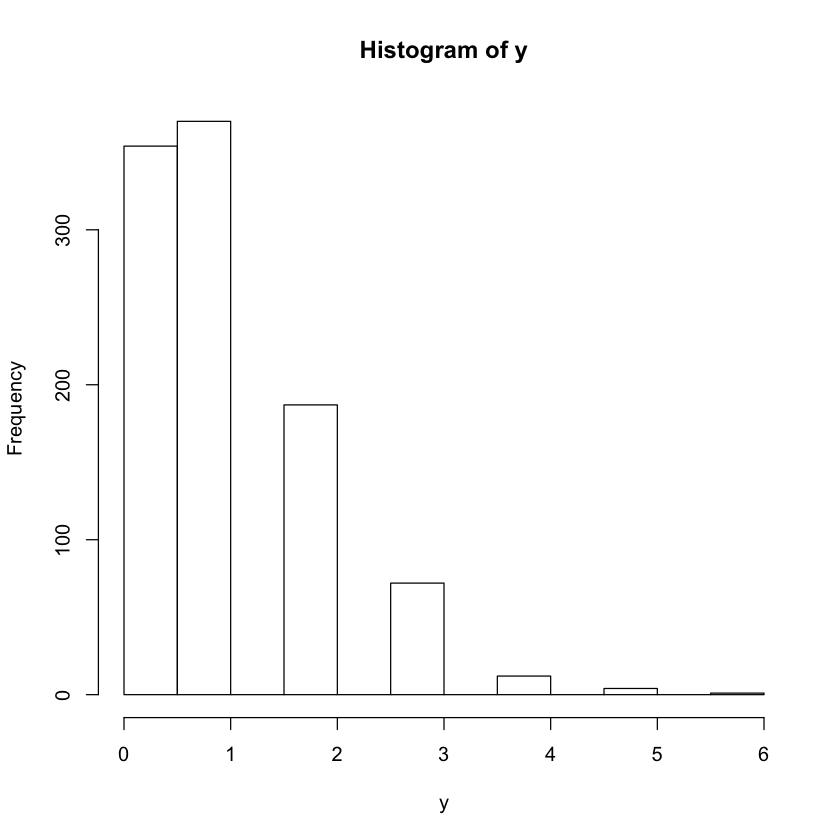

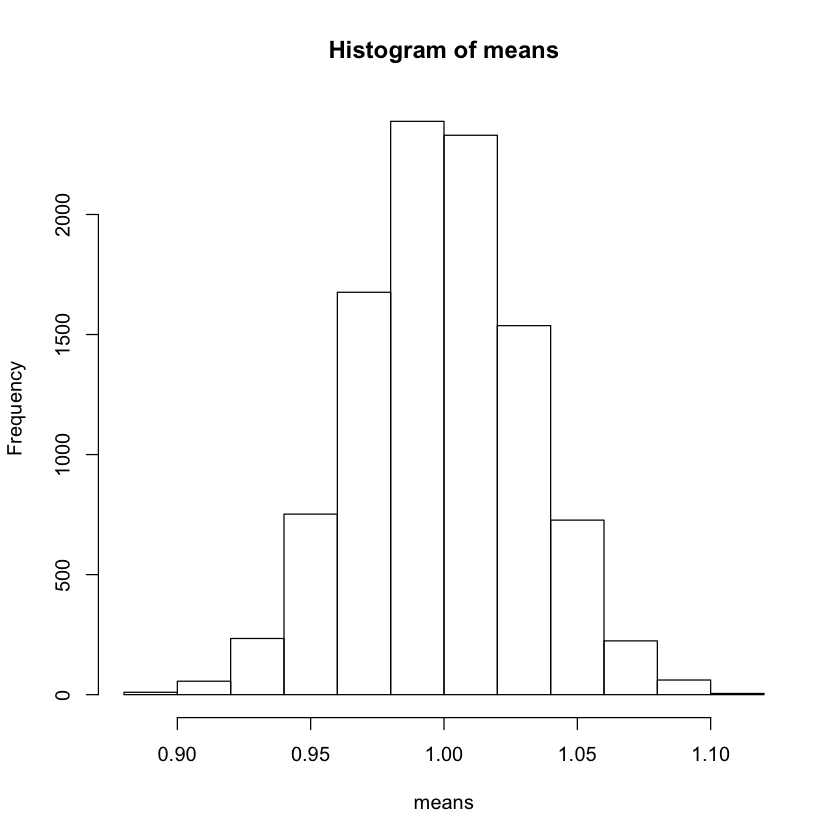

In [5]:
y <- rpois(1000, lambda=1)
hist(y) ## not normal

means <- replicate(n=10000, expr = mean(rpois(1000,lambda=1)))

hist(means)

Still looks normal, right?

### Q1. What is the result that we have talked about that allows this phenomenon to occur?
### Simulate some binomial data, with $size = n = 25, p=0.4$ and then plot a histogram of the mean


In [91]:
## use the replicate function above, but plug in rbinom instead of rpois

?rbinom

Binomial {stats},R Documentation
"x, q",vector of quantiles.
p,vector of probabilities.
n,"number of observations. If length(n) > 1, the length is taken to be the number required."
size,number of trials (zero or more).
prob,probability of success on each trial.
"log, log.p","logical; if TRUE, probabilities p are given as log(p)."
lower.tail,"logical; if TRUE (default), probabilities are P[X ≤ x], otherwise, P[X > x]."


## Standard Error

You may have been wondering exactly what the standard error is. It is simply a convenient term for **standard** deviation of the sample mean statistic. 

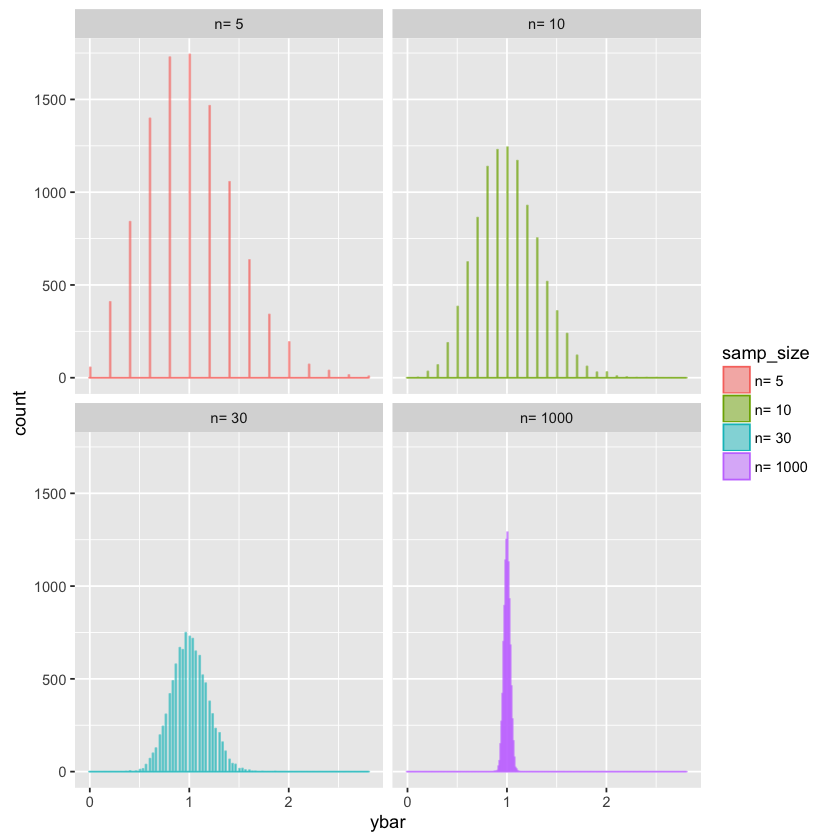

In [90]:
N <- 10000 # number of independent samples being taken
ns <- c(5,10,30, 1000)
means<-sapply(ns,function(x){replicate(n=10000, expr = mean(rpois(x,lambda=1)))})

colnames(means)<-paste("n=",ns)

library(reshape2)
library(ggplot2)
means_m <- melt(means)


colnames(means_m) <- c("obs", "samp_size", "ybar")
means_m$samp_size <- factor(means_m$samp_size)

ggplot(means_m, aes(x=ybar, color=samp_size, fill=samp_size))+
geom_histogram(alpha=0.5,binwidth=0.01) +facet_wrap(~samp_size)

We see that the distributions become more normal, but also much more peaked, with the variance getting smaller as the sample size increases. Based on the histograms above, what is your guess for the mean of these distributions?

## Confidence intervals 

(Note: $\rightarrow$ means, gets really really really close to)

We know that 
$$\frac{\sqrt{n}(\bar{X} - \mu)}{\sigma} \rightarrow N(0,1), \text{ as  } n\rightarrow \infty$$ 

if $x_1, x_2,...,x_n$ are independent distributed with mean $\mu$ and variance $\sigma$.

Let's stick with the case that $x_1,...,x_n \sim N(\mu, \sigma^2)$ independently, then 

$$
\bar{X} \sim N(\mu, \frac{\sigma}{\sqrt{n}})
$$

Thus, let's attempt to get an idea about how large the true mean $\mu$ is. The difficulty here being that, $\mu$ can be any value, between $-\infty$ to $\infty$. So, we can not come up with a 100% confident understanding of what $\mu$ is. This is imposssible, as $\mu$ is unknown. So, can we make a statement like the following?

$$
P(\mu = 0)> \epsilon
$$

The answer under the frequentist statistical framework is no. This is because $\mu$ is not a random variable, it is a fixed parameter in the population. So at best, we can create a random variable such that the random variable is one that **covers** $\mu$.

The random variable I am alluding to is a random interval, with two parts, an upper bound $UB$ and a lower bound $LB$, such that:

$$
 LB \leq \mu \leq UB
$$

with some probability we'll call $\epsilon$. So this way be can make a statement like:

$$
P(LB \leq \mu \leq UB) \geq \epsilon
$$

Let's go back to the central limit theorem:

Let 

$$
Z \sim N(0,1)
$$

Then,

$$
\frac{\sqrt{n}(\bar{X} - \mu)}{\sigma} \rightarrow Z
$$

Then let $Z_{\alpha}$ be the $\alpha$ quantile on the distribution $N(0,1)$, and note due to the normal 
distribution being symmetric $Z_{\alpha} = -Z_{1-\alpha}$.

Then 

$$
P(\frac{\sqrt{n}}{\sigma}(\bar{X} - \mu) > Z_{\alpha} ) \rightarrow 1-\alpha, \text{ as } n \rightarrow \infty 
$$

$$
= P(\mu < \bar{X} +  Z_{\alpha} \frac{\sigma}{\sqrt{n}}) = 1-\alpha,  \text{ as } n \rightarrow \infty 
$$


and we can say that 

$$
P(|\frac{\sqrt{n}}{\sigma}(\bar{X} - \mu)| > Z_{\alpha/2}) 
$$

$$
= P(\bar{X} -  Z_{\alpha/2} \frac{\sigma}{\sqrt{n}} < \mu < \bar{X} +  Z_{\alpha/2} \frac{\sigma}{\sqrt{n}}) \rightarrow 1-2\alpha/2 \rightarrow 1-\alpha
$$


### Let's explore this pictorially

The shaded parts below are the corresponding parts of the normal distribution that are lower than or greater than  $Z_{\alpha/2}$ and  $Z_{1-\alpha/2}$ respectively. In this case, $\alpha=0.05$

In [58]:
install.packages("data.table",repos="http://cran.us.r-project.org")
library(data.table)


The downloaded source packages are in
	‘/private/var/folders/44/z41l8sf111x6k2bjrjbdjhl80000gn/T/Rtmp2ubCc7/downloaded_packages’


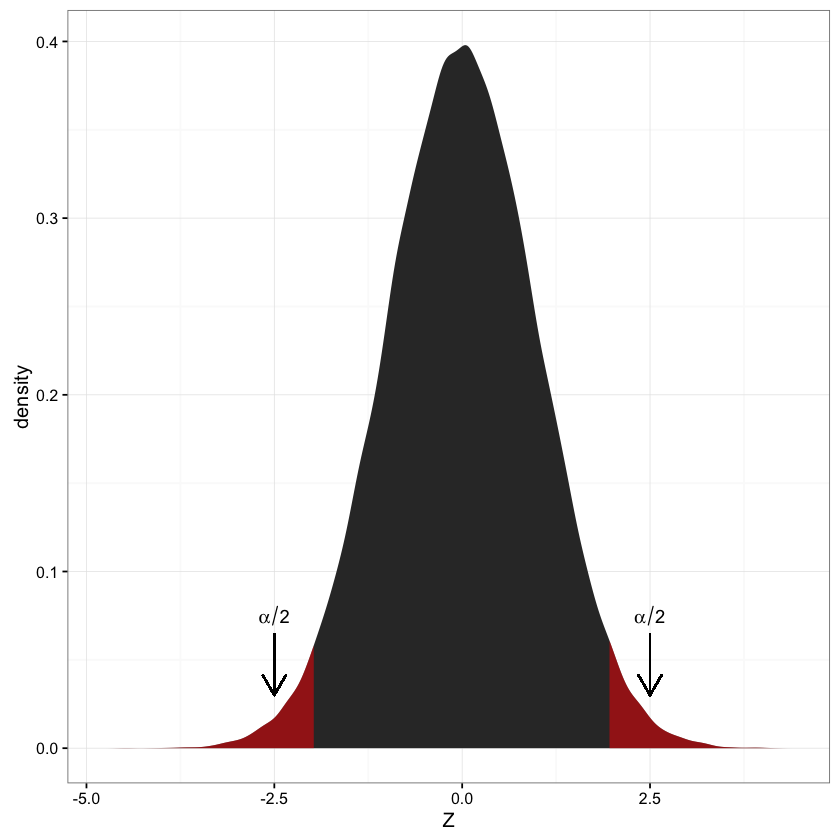

In [75]:
Z <- rnorm(100000)
dt <- data.table(Z)
#  generate kdf
gg <- dt[,list(x=density(Z)$x, y=density(Z)$y)]
#  calculate quantiles

q1 <- qnorm(0.025)
q2 <- qnorm(0.975)
ggplot(dt) + stat_density(aes(x=Z))  + geom_ribbon(data=subset(gg, x<q1),
              aes(x=x,ymax=y),ymin=0,fill="red", alpha=0.5) +
              geom_ribbon(data=subset(gg, x > q2),
              aes(x=x,ymax=y),ymin=0,fill="red", alpha=0.5) +
              annotate("text", x = -2.5, y = 0.075, label = c("alpha/2"), parse=TRUE) + 
              annotate("text", x = 2.5, y = 0.075, label = c("alpha/2"), parse=TRUE) + 
              geom_segment(aes(x = -2.5, y = .065, xend = -2.5, yend = .03), arrow = arrow(length = unit(0.5, "cm"))) + 
              geom_segment(aes(x = 2.5, y = .065, xend = 2.5, yend = .03), arrow = arrow(length = unit(0.5, "cm"))) + 
              theme_bw()

### Q2. What is the probability that $P(\mu \not \in \bar{X} \pm \frac{\sigma}{\sqrt{n}} Z_{\alpha/2})$, i.e. $\mu$ is not in the confidence interval?

# Sample Size Calculation

## Calculating sample size, $n$ for an estimator to have a certain level of confidence is fairly straightforward.

Specify the width of our confidence interval to be $W$, then $E=W/2$ is one half of it. 

$$
E = \frac{\sigma}{\sqrt{n}} Z_{1-\alpha/2}
$$

Then 

$$
n = \frac{Z_{1-\alpha/2}^2\sigma^2}{E^2}
$$

Then take the next largest integer $n^{*} > n$

## Q3

### Given a Tolerable error $W = 0.05$ and a standard deviation of $\sigma = 1$, what is the required sample size for an interval with $95%$ confidence?

### Given a Tolerable error $W = 0.05$ and a standard deviation of $\sigma = 10$, what is the required sample size for an interval with $95%$ confidence?

### Given a Tolerable error $W = 0.05$ and a standard deviation of $\sigma = 100$, what is the required sample size for an interval with $95%$ confidence?


## Hypothesis Test for the mean, $\sigma$ known.


### Example
A researcher designs a study to test the hypotheses

$$
H_0: \mu \geq 28 
$$

versus

$$
H_a: \mu < 28. 
$$

A random sample of 50 measurements from the population of interest yields $\bar{y}=25.9$ and $s =5.6$.



#### Using a 􏱞 .05, what conclusions can you make about the hypotheses based on the sample information?

We are going to form the test statistic, 

$$
Z = \frac{(\bar{Y} - \mu)}{\sigma} = N(0,1)
$$

with the assumption that $s \approx \sigma$, so we will use it as a estimator of $\sigma$.

In [84]:
y_bar <- 25.9
s <- 5.6
mu_0 <- 28

z <- sqrt(50)*(y_bar - mu_0)/s

## put the results in a nice table
results <- matrix(c(z, qnorm(.975)), ncol=2, nrow=1)
colnames(results) <- c("Z", "Critical Value")

results

Z,Critical Value
-2.651650,1.959964


Do we reject $H_0$ at $\alpha=0.05$?

### Q4 

Use a computer software program to simulate 100 samples of size 25 from a normal distribution with
$\mu = 30$ and $\sigma =5$. Test the hypotheses 

$$
H0: \mu = 30
$$
versus 
$$
Ha: \mu \neq 30 
$$
using each of the 100 samples of $n=25$ and using $\alpha = .05$.

#### a. How many of the 100 tests of hypotheses resulted in your reaching the decision to reject H0?
#### b. Suppose you were to conduct 100 tests of hypotheses and in each of these tests the true hypothesis was H0. On the average, how many of the 100 tests would have resulted in your incorrectly rejecting H0, if you were using a 􏱞 .05?
#### c. What type of error are you making if you incorrectly reject H0?

In [87]:
## some helpful code
hyp_test <- function(){
    y <- rnorm(25, mean = 30, sd=5)
    z <- sqrt(25)*(mean(y)-30)/5
    if(abs(z) > qnorm(0.975)){
        return(1)
    }else{
        return(0)
    }
}
res <- replicate(n=100, expr=hyp_test())

mean(res)

[1] 0.06

# Statistical Errors

### Statistical Errors occur when:

You reject a true $H_0$, or you fail to reject a false $H_0$. This can be viewed in a table as follows:

 | Decision/Truth | $H_0$ is False | $H_0$ is True|
| ------------- |:-------------:| -----:|
| Reject $H_0$  | Correct Inference | Type I error |
| Fail to Reject | Type II error    |  Correct Inference  |



$\alpha = P(Type I Error)$ is something that we control when we do hypothesis tests. We however, cannot control both $\beta$ and $\alpha$, as $\beta$ can be infinitely many values depending on the alternative hypotheses. $\beta = P(Type II error) = 1-power$. Let's look at a plot describing Type II error below.

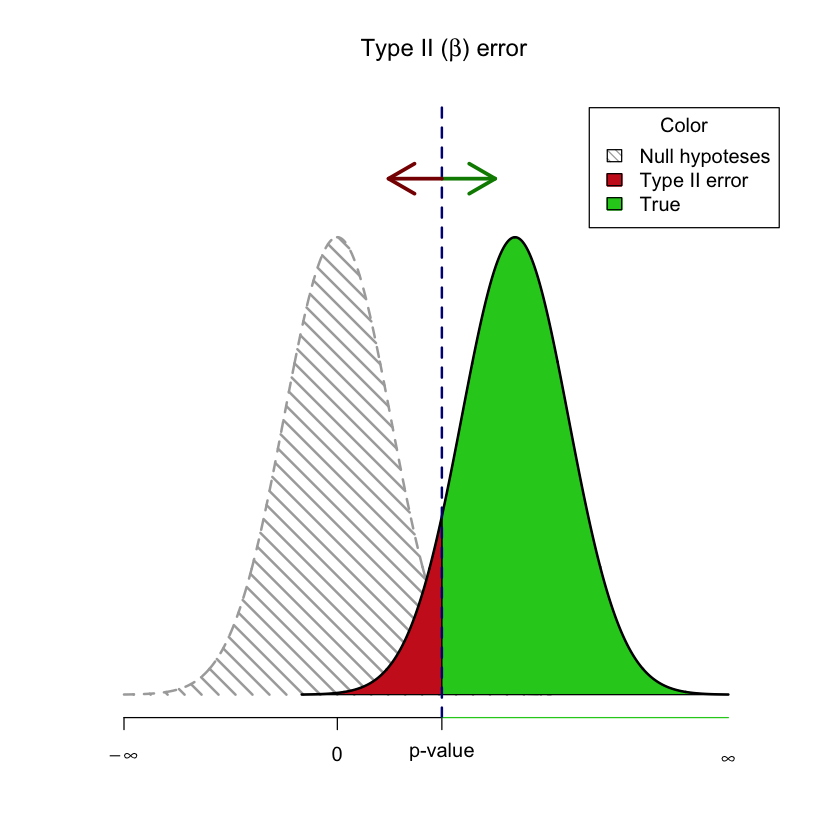

In [89]:
x <- seq(-4, 4, length=1000)
hx <- dnorm(x, mean=0, sd=1)

plot(x, hx, type="n", xlim=c(-4, 8), ylim=c(0, 0.5), 
ylab = "",
xlab = "",
main= expression(paste("Type II (", beta, ") error")), axes=FALSE)
axis(1, at = c(-qnorm(.025), 0, -4), 
     labels = expression("p-value", 0, -infinity ))

shift = qnorm(1-0.025, mean=0, sd=1)*1.7
xfit2 <- x + shift
yfit2 <- dnorm(xfit2, mean=shift, sd=1)

# Print null hypothesis area
col_null = "#AAAAAA"
polygon(c(min(x), x,max(x)), c(0,hx,0), col=col_null, lwd=2, density=c(10, 40), angle=-45, border=0)
lines(x, hx, lwd=2, lty="dashed", col=col_null)

# The alternative hypothesis area

## The red - underpowered area
lb <- min(xfit2)
ub <- round(qnorm(.975),2)
col1 = "#CC2222"

i <- xfit2 >= lb & xfit2 <= ub
polygon(c(lb,xfit2[i],ub), c(0,yfit2[i],0), col=col1)

## The green area where the power is
col2 = "#22CC22"
i <- xfit2 >= ub
polygon(c(ub,xfit2[i],max(xfit2)), c(0,yfit2[i],0), col=col2)

# Outline the alternative hypothesis
lines(xfit2, yfit2, lwd=2)

axis(1, at = (c(ub, max(xfit2))), labels=c("", expression(infinity)), 
    col=col2, lwd=1, lwd.tick=FALSE)

legend("topright", inset=.015, title="Color",
   c("Null hypoteses","Type II error", "True"), fill=c(col_null, col1, col2), 
       angle=-45,
       density=c(20, 1000, 1000), horiz=FALSE)

abline(v=ub, lwd=2, col="#000088", lty="dashed")

arrows(ub, 0.45, ub+1, 0.45, lwd=3, col="#008800")
arrows(ub, 0.45, ub-1, 0.45, lwd=3, col="#880000")